In [1]:
%matplotlib inline
#Amitava Chakraborty - 11th Jan 2018
#Preliminaries
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import numpy as np
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import BasicAer
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity
# Loading your IBM Q account(s)
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

# Simple Concatenation
## No Implicit Register

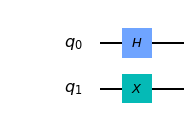

In [5]:
qc = QuantumCircuit(2)
qc1 = QuantumCircuit(2)
qc.h(0)
qc1.x(1)
qc+=qc1
qc.draw('mpl')

## Common Register

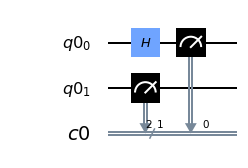

In [6]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc1 = QuantumCircuit(qr, cr)
qc2 = QuantumCircuit(qr, cr)
qc1.h(qr[0])
qc1.measure(qr[0], cr[0])
qc2.measure(qr[1], cr[1])
new_circuit = qc1 + qc2
new_circuit.draw('mpl')

## Different Registers

In [13]:
#Creating two set of Registers
q0 = QuantumRegister(2, 'q0')
c0 = ClassicalRegister(2, 'c0')

q1 = QuantumRegister(3, 'q1')
c1 = ClassicalRegister(3, 'c1')

q_test = QuantumRegister(2, 'q0')

qreg q0[2];
qreg q1[3];
creg c0[2];
creg c1[2];
h q0[0];
x q0[1];
x q1[0];
h q1[1];

qreg q1[3];
creg c1[2];
x q1[0];
h q1[1];

qreg q1[3];
qreg q0[2];
creg c1[2];
creg c0[2];
x q1[0];
h q1[1];
h q0[0];
x q0[1];



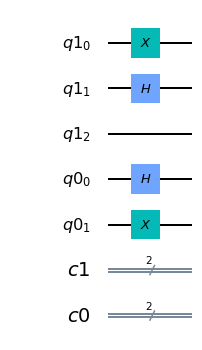

In [10]:
#We define two two-qubit circuits
#Circuit 1
qc1=QuantumCircuit(q0,c0,name='qc1')

#Circuit 2
qc2=QuantumCircuit(q1,c1,name='qc2')

#We add gates to circuit 1
qc1.h(q0[0])
qc1.x(q0[1])

#We add gates to circuit 2
qc2.x(q1[0])
qc2.h(q1[1])

#We add two circuits - made it one
qc3=qc1+qc2

print(qc3.qasm()[36:len(qc3.qasm())])

print(qc2.qasm()[36:len(qc1.qasm())])
#We may also add them this way to modify the qc2 circuit itself
qc2+=qc1

print(qc2.qasm()[36:len(qc2.qasm())])
qc2.draw('mpl')

# Complex Concatenation

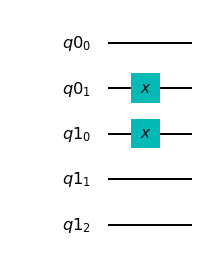

In [14]:
#Creating Circuit 1
#Quantum Circuits are made using registers - either when initiated or by using the add_register command.
circ = QuantumCircuit(q0, q1)
circ.x(q0[1])
circ.x(q1[0])
#Or this way
"""
circ2 = QuantumCircuit()
circ2.add_register(q0)
circ2.add_register(q1)
circ2.x(q0[1])
circ2.x(q1[0])
circ2.draw(output='mpl')
"""
circ.draw(output='mpl')

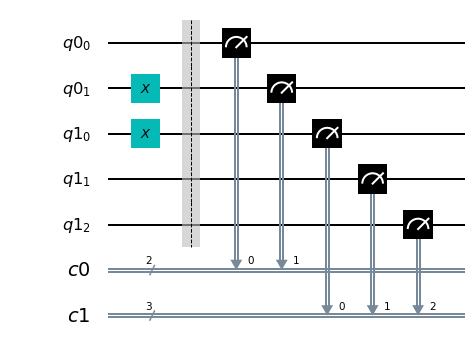

In [16]:
#Concatenating Circuits
#To concatenate two circuits to form a new circuit: 
#This is very useful when one circuit has no measurements and 
#the final circuit represents a measurement.
meas = QuantumCircuit(q0, q1, c0, c1)
meas.measure(q0, c0)
meas.measure(q1, c1)
circ.barrier()

qc = circ + meas

qc.draw(output='mpl')

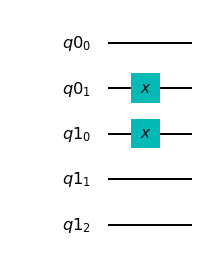

In [17]:
#Creating Circuits
circ2 = QuantumCircuit()
circ2.add_register(q0)
circ2.add_register(q1)
circ2.x(q0[1])
circ2.x(q1[0])
circ2.draw(output='mpl')

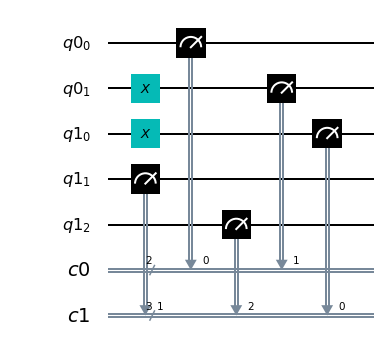

In [18]:
meas2 = QuantumCircuit()
meas2.add_register(q0)
meas2.add_register(q1)
meas2.add_register(c0)
meas2.add_register(c1)
meas2.measure(q0, c0)
meas2.measure(q1, c1)

qc2 = circ2 + meas2

qc2.draw(output='mpl')

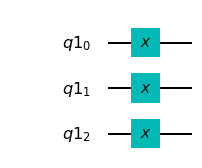

In [19]:
circ4 = QuantumCircuit(q1)
circ4.x(q1)
circ4.draw(output='mpl')

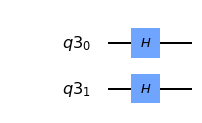

In [20]:
q3 = QuantumRegister(2, 'q3')
c3 = ClassicalRegister(2, 'c3')
circ5 = QuantumCircuit(q3)
circ5.h(q3)
circ5.draw(output='mpl')

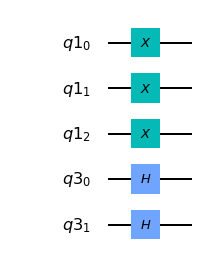

In [21]:
#The new register is added to the circuit:
(circ4+circ5).draw(output='mpl')

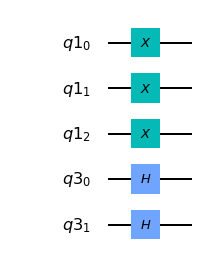

In [22]:
#We have also overloaded += to the QuantumCircuit object:
circ4 += circ5
circ4.draw(output='mpl')

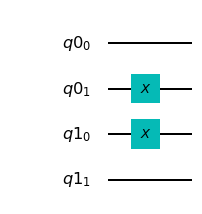

In [15]:
#Examining Circuit Results
#In the circuit output, 
#the most significant bit (MSB) is to the left and 
#the least significant bit (LSB) is to the right 
#(i.e. we follow the regular computer science little endian ordering). In this example:
circ.draw(output='mpl')

# Sharing Registers

In [23]:
q1=QuantumRegister(1,name='q1')
c1=ClassicalRegister(1,name='c1')
qc1=QuantumCircuit(q1,c1,name='qc1')

q2=QuantumRegister(1,name='q2')
c2=ClassicalRegister(1,name='c2')
qc2=QuantumCircuit(q2,c2,name='qc2')

qc1.add_register(q2)
qc2.add_register(c1)

qc1.h(q2[0])
qc2.measure(q2[0],c1[0])

print(qc1.qasm()[36:len(qc1.qasm())])
print(qc2.qasm()[36:len(qc2.qasm())])

qreg q1[1];
qreg q2[1];
creg c1[1];
h q2[0];

qreg q2[1];
creg c2[1];
creg c1[1];
measure q2[0] -> c1[0];



# Incompatible Registers

In [25]:
# circuits fails if registers are incompatible - If two circuits have same name register of different size or type
qr1 = QuantumRegister(1, "a")
qr2 = QuantumRegister(2, "b")
cr1 = ClassicalRegister(1, "c")
qc1 = QuantumCircuit(qr1)
qc2 = QuantumCircuit(qr2)
qcr3 = QuantumCircuit(qr1,cr1)

In [26]:
qc = qc1 + qc2

In [27]:
qc = qc1 + qcr3

In [30]:
# Improper args types for measure function
quantum_reg = QuantumRegister(3)
classical_reg_0 = ClassicalRegister(3)
classical_reg_1 = ClassicalRegister(2)
quantum_circuit = QuantumCircuit(quantum_reg, classical_reg_0,
                                 classical_reg_1)
quantum_circuit.h(quantum_reg)

quantum_circuit.measure(quantum_reg, classical_reg_0)